# Sign Language real-time detection 

In [4]:
pip install --user mediapipe

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import mediapipe as mp

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
# hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)
hands = mp_hands.Hands(
    static_image_mode=True,
    model_complexity=1,
    min_detection_confidence=0.9,
    min_tracking_confidence=0.9,
    max_num_hands=2)

In [3]:
from pathlib import Path

DATA_DIR = './data'
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

number_of_classes = 10
dataset_size = 100

cap = cv2.VideoCapture(0)
# counter = 0

# folder path
dir_path = r'C:\Users\ksanj\Desktop\amercian\data'
count = 0
# Iterate directory
for path in os.scandir(dir_path):
    if path.is_dir():
        count += 1
print('File count:', count,"-Files COUNT Matches NUMBER_OF_CLASSES: Increase CLASS count ")
loop = True

    
fileName = input("Enter a Sign name Before Capturing")
while fileName and count <= number_of_classes and cap.isOpened():
    # print(count)
    ret, frame = cap.read()
    # frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_rgb = cv2.flip(frame, 1)
    
    cv2.putText(frame_rgb, ' "C" : CAPTURE OR "Q" : EXIT  ! :)', (100, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3,
                cv2.LINE_AA)
    cv2.imshow('frame', frame_rgb)
    
    if  cv2.waitKey(25) == ord('c'):
        if not os.path.exists(os.path.join(DATA_DIR, str(fileName))):
            os.makedirs(os.path.join(DATA_DIR, str(fileName)))
        counter = 0
        while counter < dataset_size:
            ret, frame = cap.read()
            frame_rgb = cv2.flip(frame, 1)
            cv2.imshow('frame', frame_rgb)
            cv2.waitKey(25)
            cv2.imwrite(os.path.join(DATA_DIR, str(fileName), '{}.jpg'.format(counter)), frame_rgb)
            counter += 1
        print('Collected data for class {}'.format(count))
        count +=1 
    if cv2.waitKey(25) & 0xFF == ord('q'):
        print("Exited")
        break
        

        # while counter < dataset_size:
            
        #     ret, frame = cap.read()
        #     cv2.imshow('frame', frame)
        #     cv2.waitKey(25)
        #     cv2.imwrite(os.path.join(DATA_DIR, str(count), '{}.jpg'.format(counter)), frame)
        #     count +=1 
            
            
        
cap.release()
cv2.destroyAllWindows()

File count: 7 -Files COUNT Matches NUMBER_OF_CLASSES: Increase CLASS count 


Enter a Sign name Before Capturing how are you


Collected data for class 7
Exited


In [4]:
from google.protobuf.json_format import MessageToDict
import warnings
warnings.filterwarnings("ignore")
data_dir = './data'
print(data_dir)
data = []
labels = []

for i in sorted(os.listdir(data_dir)):
    dataLen = len(data)
    print(i)
    if i == '.DS_Store':
        print("pass")
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i)):
            # print("Entered")
            data_aux = []
            x_ = []
            y_ = []
            
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            results = hands.process(img_rgb)
            # print("results :",results, "j :",j)
            
            if results.multi_hand_landmarks:
                print("HAND_LANDMARKS", j)
                for hand_landmarks in results.multi_hand_landmarks:
                    # for y in range(len(hand_landmarks.landmark)):
                    #     x = hand_landmarks.landmark[y].x
                    #     y = hand_landmarks.landmark[y].y
    
                    #     x_.append(x)
                    #     y_.append(y)
                    for z in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[z].x
                        y = hand_landmarks.landmark[z].y
                        # data_aux.append(x - min(x_))
                        # data_aux.append(y - min(y_))
                        data_aux.append(x)
                        data_aux.append(y)
                data.append(data_aux)
                # print("label",i)
                labels.append(i)

    print(len(data) - dataLen)
# save data
# print(data)
print("labels",len(labels))
f = open('data.pickle', 'wb')
pickle.dump({'data':data,'labels':labels},f)
f.close() 

./data
A
HAND_LANDMARKS 0.jpg
HAND_LANDMARKS 1.jpg
HAND_LANDMARKS 10.jpg
HAND_LANDMARKS 11.jpg
HAND_LANDMARKS 12.jpg
HAND_LANDMARKS 13.jpg
HAND_LANDMARKS 14.jpg
HAND_LANDMARKS 15.jpg
HAND_LANDMARKS 16.jpg
HAND_LANDMARKS 17.jpg
HAND_LANDMARKS 18.jpg
HAND_LANDMARKS 19.jpg
HAND_LANDMARKS 2.jpg
HAND_LANDMARKS 20.jpg
HAND_LANDMARKS 21.jpg
HAND_LANDMARKS 22.jpg
HAND_LANDMARKS 23.jpg
HAND_LANDMARKS 24.jpg
HAND_LANDMARKS 25.jpg
HAND_LANDMARKS 26.jpg
HAND_LANDMARKS 27.jpg
HAND_LANDMARKS 28.jpg
HAND_LANDMARKS 29.jpg
HAND_LANDMARKS 3.jpg
HAND_LANDMARKS 30.jpg
HAND_LANDMARKS 31.jpg
HAND_LANDMARKS 32.jpg
HAND_LANDMARKS 33.jpg
HAND_LANDMARKS 34.jpg
HAND_LANDMARKS 35.jpg
HAND_LANDMARKS 38.jpg
HAND_LANDMARKS 39.jpg
HAND_LANDMARKS 4.jpg
HAND_LANDMARKS 40.jpg
HAND_LANDMARKS 41.jpg
HAND_LANDMARKS 42.jpg
HAND_LANDMARKS 43.jpg
HAND_LANDMARKS 44.jpg
HAND_LANDMARKS 45.jpg
HAND_LANDMARKS 46.jpg
HAND_LANDMARKS 47.jpg
HAND_LANDMARKS 48.jpg
HAND_LANDMARKS 49.jpg
HAND_LANDMARKS 50.jpg
HAND_LANDMARKS 51.jpg
HAND_L

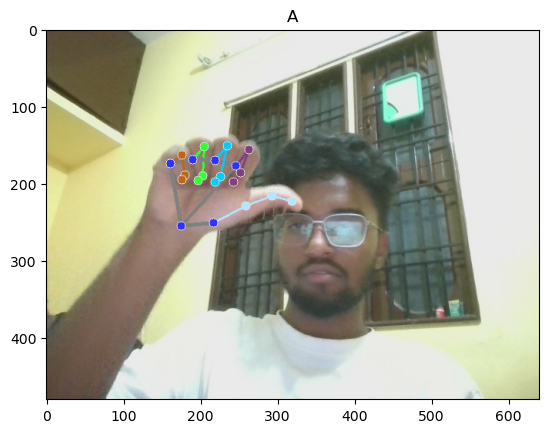

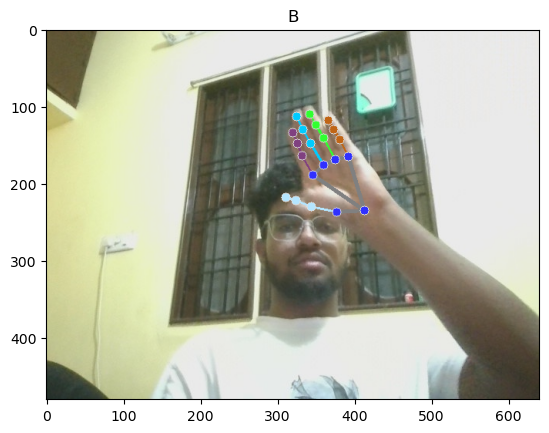

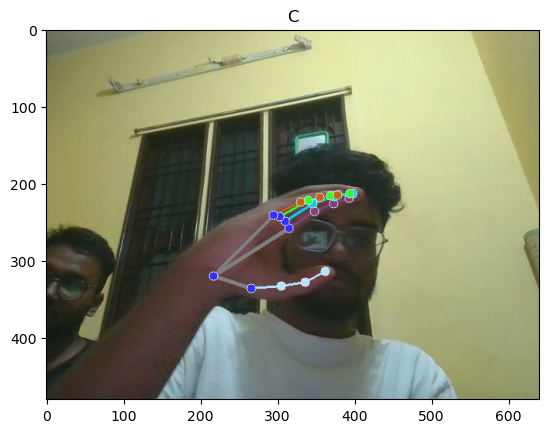

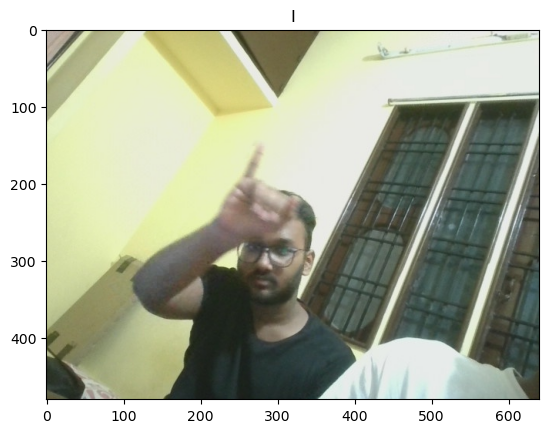

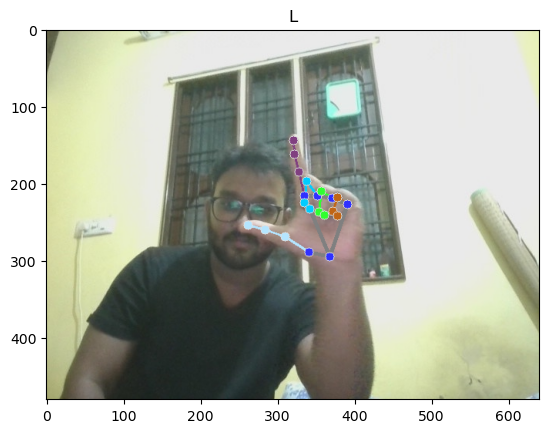

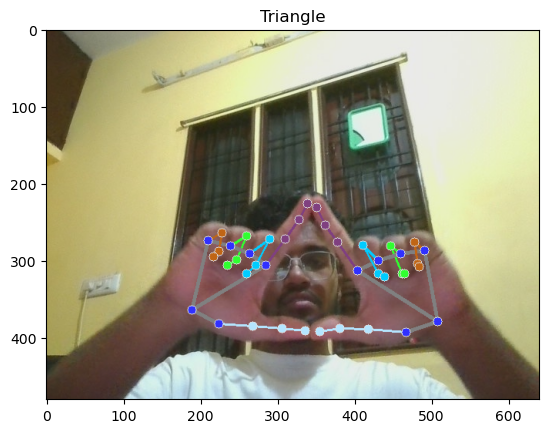

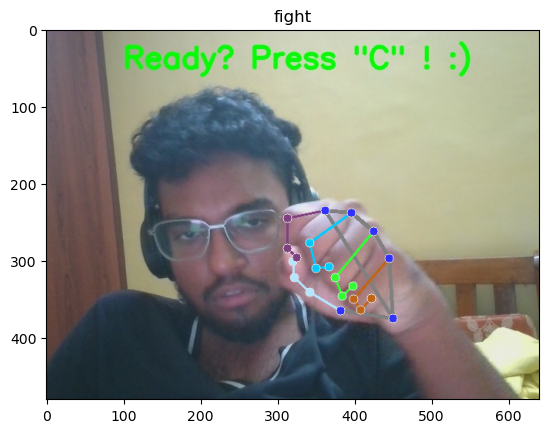

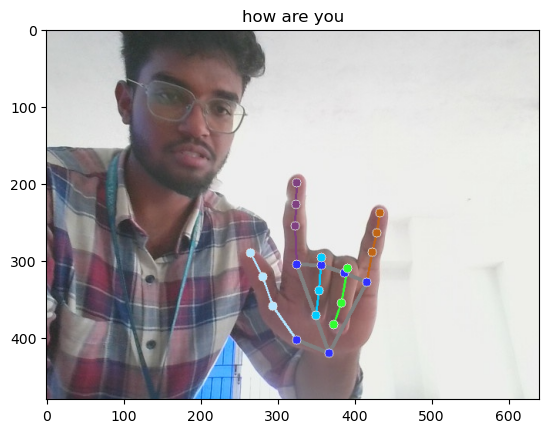

In [6]:
# visualize landmarks
data_dir = './data'
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i))[10:11]:
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            results = hands.process(img_rgb)
            
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        img_rgb, # img to draw
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()

                    )

            
            plt.figure()
            plt.title(i)
            plt.imshow(img_rgb)
plt.show()

# Training

In [7]:
pkl_file = pickle.load(open('./data.pickle', 'rb'))
data1 = pkl_file['data']


# print(data,labels)
desired_length = 41
sequences = data1
padded_sequences = [seq + [0] * (desired_length - len(seq)) for seq in sequences if len(seq) < desired_length]
truncated_sequences = [seq[:desired_length] for seq in sequences if len(seq) > desired_length]
uniform_sequences = padded_sequences + truncated_sequences
x = np.array(uniform_sequences)

# split data

# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True,stratify=labels)

# X_train, X_test, y_train, y_test = train_test_split(np.array(data, dtype=float), labels, test_size=0.2, random_state=42, shuffle=True,stratify=labels)

X_train, X_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=desired_length, shuffle=True,stratify=labels)

# X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.15, random_state=22, shuffle=True)

# X_train= X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

print("[SIZE]\t\tTrain X size : {}, Train y size : {}\n\t\tTest X size : {}, Test y size : {}"\
        .format(len(X_train), len(y_train), len(X_test), len(y_test)))
# print(X_train)
# model
# train_dataloadloader = DataLoader(X_train)
# test_dataloader = DataLoader(X_test)
# X_train = np.array(X_train, dtype=np.float64)

# X_train = np.array(data)

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

# predict
pred=model.predict(X_test)
# accruracy
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)

# precision = precision_score(y_test, pred, average='weighted')
# recall = recall_score(y_test, pred, average='weighted')
# f1 = f1_score(y_test, pred, average='weighted')
# conf_matrix = confusion_matrix(y_test, pred)

# score = accuracy_score(y_test,pred)

# print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')
# print(f'Confusion Matrix:\n{conf_matrix}')
print('{}% of samples were classified correctly !'.format(accuracy * 100))

[SIZE]		Train X size : 491, Train y size : 491
		Test X size : 123, Test y size : 123
100.0% of samples were classified correctly !


In [8]:
# save model
f = open('model.p', 'wb')
pickle.dump({'model':model},f)
f.close() 

# Detection

In [9]:
# load model
model_dict = pickle.load(open('model.p','rb'))
model = model_dict['model']

In [10]:
# from google.protobuf.json_format import MessageToDict
# import warnings
# warnings.filterwarnings("ignore")
cap = cv2.VideoCapture(0)
# labels_dict = {0: 'A', 1: 'B', 2: 'L',3:"D",4:"3" , 5:"lsls" , 6: "Heloo"}
hands = mp_hands.Hands(
    static_image_mode=False,
    model_complexity=1,
    min_detection_confidence=0.6,
    min_tracking_confidence=0.8,
    max_num_hands=2)
# mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.8) as
with hands:
    while cap.isOpened():

        data_aux=[]
        x_ = []
        y_ = []
        x_x = []
        y_y = []

        ret, frame = cap.read()
        H, W, _ = frame.shape

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = cv2.flip(frame_rgb, 1)
        frame_rgb.flags.writeable = False
        results = hands.process(frame_rgb)
        frame_rgb.flags.writeable = True 
        frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame_rgb, # img to draw
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()

                    # mp_drawing.DrawingSpec(color=(28, 255, 3), thickness=5, circle_radius=10),
                    # mp_drawing.DrawingSpec(color=(236, 255, 3), thickness=5, circle_radius=10)
                )


            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
                    x_.append(x)
                    y_.append(y)
                # for y in range(len(hand_landmarks.landmark)):
                #         x = hand_landmarks.landmark[y].x
                #         y = hand_landmarks.landmark[y].y
    
                #         x_x.append(x)
                #         y_y.append(y)
                # for z in range(len(hand_landmarks.landmark)):
                #         x = hand_landmarks.landmark[z].x
                #         y = hand_landmarks.landmark[z].y
                #         data_aux.append(x - min(x_x))
                #         data_aux.append(y - min(y_y))
                #         x_.append(x)
                #         y_.append(y)
                        # data_aux.append(x)
                        # data_aux.append(y)

            x1 = int(min(x_) * W)-10
            y1 = int(min(y_) * H)-10

            x2 = int(max(x_) * W)-10
            y2 = int(max(y_) * H)-10
            
            # prediction = model.predict([np.array(data_aux)[0]])[0]
            prediction = model.predict([np.asarray(data_aux)[:41]])[0]
            # print(prediction)
            # predicted_character = labels_dict[int(prediction)]
    
            cv2.rectangle(frame_rgb, (x1,y1-10), (x2,y2), (255,99,173), 3)
            cv2.putText(frame_rgb, prediction, (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (255,0,0), 2, cv2.LINE_AA)

        cv2.imshow('frame',frame_rgb)  
        # cv2.waitKey(1)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()